# Main dataset preprocessing and merging with supplementary data

In [1]:
import numpy
import pandas
import os
from os import path
# import gender_guesser.detector as gender

### load up donation dataset

In [ ]:
#data source: https://search.electoralcommission.org.uk/Search/Donations?currentPage=1&rows=10&sort=AcceptedDate&order=desc&tab=1&et=pp&et=ppm&et=tp&et=perpar&et=rd&isIrishSourceYes=true&isIrishSourceNo=true&prePoll=false&postPoll=true&register=gb&register=ni&register=none&optCols=Register&optCols=CampaigningName&optCols=AccountingUnitsAsCentralParty&optCols=IsSponsorship&optCols=IsIrishSource&optCols=RegulatedDoneeType&optCols=CompanyRegistrationNumber&optCols=Postcode&optCols=NatureOfDonation&optCols=PurposeOfVisit&optCols=DonationAction&optCols=ReportedDate&optCols=IsReportedPrePoll&optCols=ReportingPeriodName&optCols=IsBequest&optCols=IsAggregation
#filename is name of file in local storage, change to own path!
df = pandas.read_csv("Data/results.csv")
# df.info()

In [3]:
print(df["RegulatedEntityType"].unique())
print()
print(df.columns)
print(len(df.columns))

['Regulated Donee' 'Third Party' 'Political Party' 'Permitted Participant']

Index(['ECRef', 'RegulatedEntityName', 'RegulatedEntityType', 'Value',
       'AcceptedDate', 'AccountingUnitName', 'DonorName',
       'AccountingUnitsAsCentralParty', 'IsSponsorship', 'DonorStatus',
       'RegulatedDoneeType', 'CompanyRegistrationNumber', 'Postcode',
       'DonationType', 'NatureOfDonation', 'PurposeOfVisit', 'DonationAction',
       'ReceivedDate', 'ReportedDate', 'IsReportedPrePoll',
       'ReportingPeriodName', 'IsBequest', 'IsAggregation',
       'RegulatedEntityId', 'AccountingUnitId', 'DonorId', 'CampaigningName',
       'RegisterName', 'IsIrishSource'],
      dtype='object')
29


In [4]:
df.head(15)

,ECRef,RegulatedEntityName,RegulatedEntityType,Value,AcceptedDate,AccountingUnitName,DonorName,AccountingUnitsAsCentralParty,IsSponsorship,DonorStatus,...,IsReportedPrePoll,ReportingPeriodName,IsBequest,IsAggregation,RegulatedEntityId,AccountingUnitId,DonorId,CampaigningName,RegisterName,IsIrishSource
0,C0583991,Labour Campaign For Electoral Reform,Regulated Donee,"£20,000.00",08/07/2024,NaN,Joseph Rowntree Reform Trust,False,False,Company,...,NaN,August 2024,False,False,17630,NaN,99201.0,NaN,Great Britain,False
1,C0579011,Labour Together,Regulated Donee,"£175,500.00",08/07/2024,NaN,Lord David Sainsbury,False,False,Individual,...,NaN,July 2024,False,False,3912,NaN,99815.0,NaN,Great Britain,False
2,C0579009,Labour Together,Regulated Donee,"£12,500.00",24/06/2024,NaN,Mr Trevor Chinn,False,False,Individual,...,NaN,July 2024,False,False,3912,NaN,83243.0,NaN,Great Britain,False
3,C0579010,Labour Together,Regulated Donee,"£325,000.00",21/06/2024,NaN,Martin Taylor,False,False,Individual,...,NaN,July 2024,False,False,3912,NaN,72372.0,NaN,Great Britain,False
4,C0579007,The Spring Lunch,Regulated Donee,"£6,000.00",21/06/2024,NaN,FT Estates Ltd,False,False,Company,...,NaN,July 2024,False,True,1621,NaN,100697.0,NaN,Great Britain,False
5,C0578696,Wes Streeting,Regulated Donee,"£1,500.00",01/06/2024,NaN,Sir Trevor Chinn,False,False,Individual,...,NaN,June 2024,False,True,6346,NaN,93638.0,NaN,Great Britain,False
6,C0578678,The Rt Hon Dr Liam Fox MP,Regulated Donee,"£10,000.00",28/05/2024,NaN,Partners & Limited,False,False,Company,...,NaN,June 2024,False,False,1035,NaN,95230.0,NaN,Great Britain,False
7,NC0578606,Andy Burnham,Regulated Donee,"£26,750.00",24/05/2024,NaN,B & Combes LLP,False,False,Limited Liability Partnership,...,NaN,June 2024,False,False,1469,NaN,100595.0,NaN,Great Britain,False
8,C0579008,Northern Campaign Group,Regulated Donee,"£60,000.00",24/05/2024,NaN,Cohiba Support Services Ltd,False,False,Company,...,NaN,July 2024,False,False,17447,NaN,100698.0,NaN,Great Britain,False
9,C0578682,Simon Clarke,Regulated Donee,"£5,000.00",24/05/2024,NaN,John Hall,False,False,Individual,...,NaN,June 2024,False,False,6668,NaN,98913.0,NaN,Great Britain,False


In [5]:
wip_df = df.copy()
wip_df["Value"] = wip_df["Value"].apply(lambda x: x.replace("£", ""))
wip_df["Value"] = wip_df["Value"].apply(lambda x: x.replace(",", ""))
wip_df["Value"] = wip_df["Value"].astype('float')
# print(wip_df.head(5))

0    08/07/2024
1    08/07/2024
2    24/06/2024
3    21/06/2024
4    21/06/2024
Name: AcceptedDate, dtype: object

0   2024-07-08
1   2024-07-08
2   2024-06-24
3   2024-06-21
4   2024-06-21
Name: AcceptedDate, dtype: datetime64[ns]

2001-01-01 00:00:00
2024-07-08 00:00:00

0     20000.0
1    175500.0
2     12500.0
3    325000.0
4      6000.0
Name: Value, dtype: float64


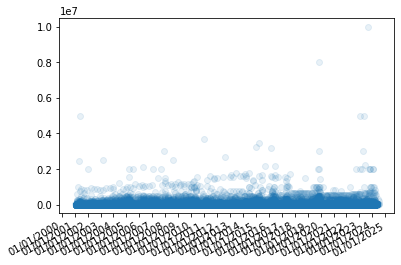

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

X_dates = wip_df["AcceptedDate"]
print(X_dates.head())
X_dates = pandas.to_datetime(X_dates, format="%d/%m/%Y")
print()
print(X_dates.head())
print()
print(X_dates.min())
min_date = X_dates.min()
print(X_dates.max())
max_date = X_dates.max()
# X_dates = X_dates.apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
y_vals = wip_df["Value"]
print()
print(y_vals.head())

days = mdates.drange(min_date,max_date,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(X_dates,y_vals, alpha=0.1)
plt.gcf().autofmt_xdate()

# uncomment line below to zoom in further
# plt.gca().set_ylim(0, 500000)

plt.savefig("donation_distribution.jpg")
plt.show()
